<a href="https://colab.research.google.com/github/Rsotoo/Analitica/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#dESCARGANDO BASE DE DATOS vovid-19
!pip install wget
import wget
import pandas as pd
#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"

wget.download(url, 'covid.csv')
Xd = pd.read_csv('covid.csv')
#Xd = pd.read_csv('/content/time_series_covid_19_confirmed.csv')


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=460a1c1f8ea6e1aa7ffb7f4700cfe6620c5f677083b58ec3b710c4befbc784ba
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
Xd[Xd.columns[1]]=='colombia';
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8


82


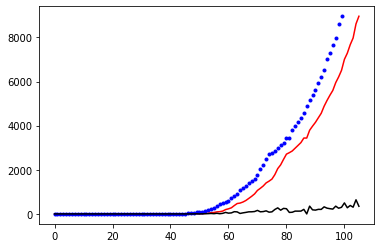

In [0]:
import numpy as np
import matplotlib.pyplot as plt
ii = Xd[Xd.columns[1]] == 'Colombia'
print(np.where(ii)[0][0])
#serie: positivos en total
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#Serie diferencial, contagiados por dia( se hace sacando la derivada)
serie_d=np.append(0,np.diff(serie));

#w es la cantidad de dias a guardar en X, es una matriz de (n=dias desde el 22 de enero de 2020 hasta la fecha-w,w)
w = 5
pi =0
pf = w
#aca se hace el ventaneo de a W
X = serie[pi:pf].reshape(1,-1)
y = serie[pf+1].reshape(1,-1)

pi += 1
pf+= 1
while pf+1< serie.shape[0]:
  X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0);
  y = np.append(y,serie[pf+1].reshape(1,-1),axis=0);
  pi += 1;
  pf+=1;
  #print(pi,pf,pf+1);


#AHORA CON EL DIFERENCIAL
w = 5
pi =0
pf = w
#aca se hace el ventaneo de a W con diferencial
X_d = serie_d[pi:pf].reshape(1,-1)
y_d = serie_d[pf+1].reshape(1,-1)

pi += 1
pf+= 1
while pf+1 < serie_d.shape[0]:
  X_d= np.append(X_d,serie_d[pi:pf].reshape(1,-1),axis=0);
  y_d = np.append(y_d,serie_d[pf+1].reshape(1,-1),axis=0);
  pi += 1;
  pf+=1;
  #print(pi,pf,pf+1);
   
#print(X.shape);
#print(y.shape);
# el original es:
plt.plot(serie,'r');
# con el ventaneo queda)
plt.plot(y,'b.');
#El retraso que se ve es devido a el ventaneo (lag)
#la azul esta retrasada W unidades, en este caso dias.
#negro es el de casos por cada dia
plt.plot(serie_d,'k');

In [0]:
#Importaciones 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as msa
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [0]:
#Modelos
steps = [
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  LinearRegression())],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  Ridge())],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  Lasso())],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  ElasticNet())],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  KernelRidge(kernel='rbf'))],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  KernelRidge(kernel='laplacian'))],
             [('scaler', StandardScaler()),
              ('rep', PCA()),
              ('reg',  KernelRidge(kernel='sigmoid'))] 
                       ]
#Parametro de los modelos
parameters =[
             {
              },
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10],
              'reg__gamma':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10],
              'reg__gamma':[1e-4,1e-3,1e-2,1e-1,1,10]},
             {'reg__alpha':[1e-4,1e-3,1e-2,1e-1,1,10],
              'reg__gamma':[1e-4,1e-3,1e-2,1e-1,1,10]}
             ]

In [0]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 
#############################
for j in range(Niter): #outter loop
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
      

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s


it 1/10-Modelo 1/7
best hyper {}
msa: 49.59642054599392
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 1/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 48.99491591798487
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s


it 1/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 47.21730757480103
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 1/10-Modelo 4/7
best hyper {'reg__alpha': 0.001}
msa: 51.605626375040366
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10-Modelo 5/7
best hyper {'reg__alpha': 0.01}
msa: 52.97010962550324
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 1/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 32.75083250307295
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10-Modelo 7/7
best hyper {'reg__alpha': 0.01, 'reg__gamma': 0.1}
msa: 52.31428003110277
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 2/10-Modelo 1/7
best hyper {}
msa: 52.98349793828329
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 2/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 56.62533275813572
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s


it 2/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 55.96027358798833
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 2/10-Modelo 4/7
best hyper {'reg__alpha': 0.001}
msa: 63.22755034090361
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 41.66441389587124
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 2/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 27.23352052296826
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 54.25048221125326
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 3/10-Modelo 1/7
best hyper {}
msa: 52.206842166548505
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 3/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 51.33681564822253
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 52.05165347994536
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 3/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 51.50391868869472
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 3/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 47.62444602107254
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s


it 3/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 39.7572778426232
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 1}
msa: 49.251887906157755
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 4/10-Modelo 1/7
best hyper {}
msa: 63.08685256969376
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 4/10-Modelo 2/7
best hyper {'reg__alpha': 0.001}
msa: 63.04021062852137
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10-Modelo 3/7
best hyper {'reg__alpha': 0.0001}
msa: 63.08659426928274
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 4/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 63.04026526093248
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s


it 4/10-Modelo 5/7
best hyper {'reg__alpha': 0.0001}
msa: 54.06210167646559
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 4/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 52.43017419798577
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 57.265301391431905
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 5/10-Modelo 1/7
best hyper {}
msa: 63.22117855323047
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 5/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 56.20699691447863
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s


it 5/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 58.72515748687247
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 5/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 58.67629496288207
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 5/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 126.44713676310272
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 5/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 87.94509296194616
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 

it 5/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1}
msa: 44.00535434236852
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 6/10-Modelo 1/7
best hyper {}
msa: 46.846098505785605
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 6/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 45.77763480795489
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 46.2773961320001
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 6/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 46.38461347426776
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 6/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 35.460326965044835
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 6/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 34.098992716646144
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 40.448654550872746
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 7/10-Modelo 1/7
best hyper {}
msa: 49.69445442202807
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 7/10-Modelo 2/7
best hyper {'reg__alpha': 0.001}
msa: 49.09453300576483
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished


it 7/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 47.06189309803525
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 7/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 48.06588323780975
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 7/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 114.52879965193516
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 7/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 79.29228249334197
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 7/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 42.3955252758984
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 8/10-Modelo 1/7
best hyper {}
msa: 85.63747591886404
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 8/10-Modelo 2/7
best hyper {'reg__alpha': 0.0001}
msa: 84.99666065222976
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10-Modelo 3/7
best hyper {'reg__alpha': 0.01}
msa: 84.23750679816217
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 8/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 72.15326842565464
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 8/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 112.28046024131302
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.1s


it 8/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 53.71884847632409
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 8/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 62.013416573459594
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 9/10-Modelo 1/7
best hyper {}
msa: 51.62296882398245
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 9/10-Modelo 2/7
best hyper {'reg__alpha': 0.001}
msa: 51.43779805538364
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 9/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 50.22524368200165
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 9/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 51.107975812786044
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s


it 9/10-Modelo 5/7
best hyper {'reg__alpha': 0.0001}
msa: 127.20129549703945
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 9/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 82.83709632167157
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10-Modelo 7/7
best hyper {'reg__alpha': 0.01, 'reg__gamma': 1}
msa: 38.21246734581495
Fitting 5 folds for each of 1 candidates, totalling 5 fits
it 10/10-Modelo 1/7
best hyper {}
msa: 59.64022766415176
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 10/10-Modelo 2/7
best hyper {'reg__alpha': 0.01}
msa: 61.0162650397454
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10-Modelo 3/7
best hyper {'reg__alpha': 0.1}
msa: 62.36507411310913
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 10/10-Modelo 4/7
best hyper {'reg__alpha': 0.0001}
msa: 60.15551891594487
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s


it 10/10-Modelo 5/7
best hyper {'reg__alpha': 0.001}
msa: 40.84155076512958
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 10/10-Modelo 6/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 25.102242321212785
Fitting 5 folds for each of 36 candidates, totalling 180 fits
it 10/10-Modelo 7/7
best hyper {'reg__alpha': 0.0001, 'reg__gamma': 0.01}
msa: 62.62991887254951


[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


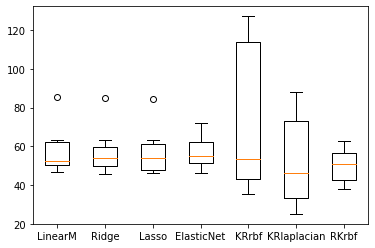

In [0]:
plt.boxplot(msev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=['LinearM','Ridge','Lasso','ElasticNet','KRrbf','KRlaplacian','RKrbf'])
plt.show()

In [0]:
len(best_hyperpar[0][1])
#plt.boxplot(msev[1][:])
#plt.show()

1

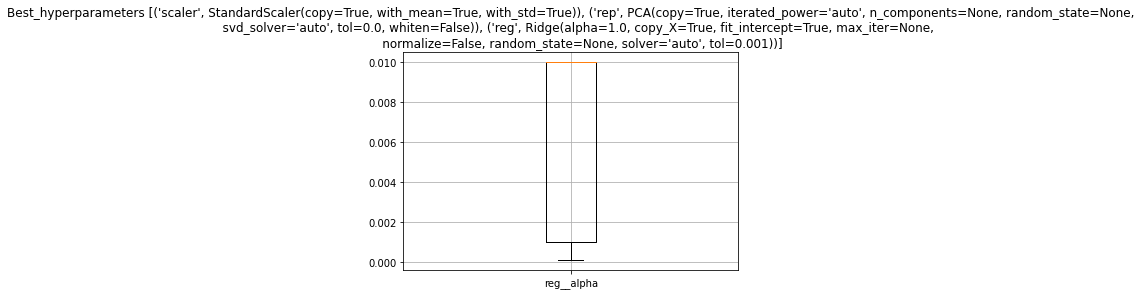

Modes=  [0.01]


In [0]:
from scipy.stats import mode
from datetime import date

r = 1 #hyperparameters model 1
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh)) 
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])
    
    
#revisar numero entero para realizar casting
aa = list(best_hyperpar[0][r].keys())
c = -1
for i in range(len(aa)):
    if aa[i].find('reg__alpha') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+str(steps[r]))
plt.grid()
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Modes= ", mode_hyper)

In [0]:
#entrenar con mejores hyperparametros
model_f = Pipeline(steps[r])
paramsf = parameters[r]
hyperl = list(parameters[r].keys())
nh = len(hyperl)
for j in range(nh):
  if j == c: 
    paramsf[hyperl[j]] = int(mode_hyper[j])
  else:
     paramsf[hyperl[j]] = mode_hyper[j] 

model_f.set_params(**paramsf)
model_f.fit(X,y) #entrenar con todos los datos porque no tenemos suficientes > 10000 entrenar xtrain de lo contrario con todo el dataset

print('Predicción contagiados covid19 ',date.today(),'=',model_f.predict(serie[len(serie)-w:].reshape(1,-1))[0])

Predicción contagiados covid19  2020-05-07 = [9958.66796171]


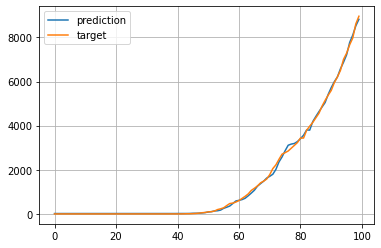

In [0]:
#curva predicción sobre modelo  final
plt.plot(model_f.predict(X),label='prediction')
plt.plot(y,label='target')
plt.grid()
plt.legend()
plt.show()